# Customer Churn Prediction
                                            - Kenny.D

1. Data Cleaning
2. EDA
3. Model Building

#### Data Cleaning
1. Handle Null Values
2. Remove Duplicates
3. Clean SeniorCitizen Column from trash values
4. Drop CustomerID column

#### Exploratory Data Analysis
1. Plot countplots for categorical variables vs Churn
2. Plot barplots for numerical variables vs Churn
3. Plot heatmap of correlation

#### Model Building
1. Pre-processing  
    a. Train Test Split  
    b. One hot encoding for Categorical Variables  
    c. Scaling of Numerical Variables 
      
2. Machine Learning  
    a. Logistic Regression  
    b. Decision Tree  
    c. K Nearest Neighbor  
    d. Random Forest Classifier  
      
3. Testing  
    a. Accuracy Score  
    b. Confusion Matrix  
    c. Classification Report  
      

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("churn.csv")

Checking the data

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,InternetConnection,OnlineSecurity,...,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,Agreement,BillingMethod,PaymentMethod,MonthlyServiceCharges,TotalAmount,Churn
0,2907-ILJBN,Female,0.0,Yes,Yes,11.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.60,233.90,No
1,3896-RCYYE,Female,0.0,No,No,67.0,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),53.40,3579.15,No
2,9764-REAFF,Female,0.0,Yes,No,59.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,No
3,6651-RLGGM,Male,0.0,Yes,Yes,67.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.30,1688.90,No
4,5879-SESNB,Female,0.0,No,No,11.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,75.25,888.65,No


In [4]:
df.head().T

,0,1,2,3,4
customerID,2907-ILJBN,3896-RCYYE,9764-REAFF,6651-RLGGM,5879-SESNB
gender,Female,Female,Female,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,Yes,Yes,No
Dependents,Yes,No,No,Yes,No
tenure,11,67,59,67,11
CallService,Yes,No,Yes,Yes,Yes
MultipleConnections,No,No phone service,No,Yes,Yes
InternetConnection,No,DSL,No,No,Fiber optic
OnlineSecurity,No internet service,No,No internet service,No internet service,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12335 entries, 0 to 12334
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               12335 non-null  object 
 1   gender                   12335 non-null  object 
 2   SeniorCitizen            12335 non-null  float64
 3   Partner                  12335 non-null  object 
 4   Dependents               12335 non-null  object 
 5   tenure                   12335 non-null  float64
 6   CallService              12335 non-null  object 
 7   MultipleConnections      12335 non-null  object 
 8   InternetConnection       12335 non-null  object 
 9   OnlineSecurity           12335 non-null  object 
 10  OnlineBackup             12335 non-null  object 
 11  DeviceProtectionService  12335 non-null  object 
 12  TechnicalHelp            12335 non-null  object 
 13  OnlineTV                 12335 non-null  object 
 14  OnlineMovies          

In [6]:
df.isnull().sum()

customerID                 0
gender                     0
SeniorCitizen              0
Partner                    0
Dependents                 0
tenure                     0
CallService                0
MultipleConnections        0
InternetConnection         0
OnlineSecurity             0
OnlineBackup               0
DeviceProtectionService    0
TechnicalHelp              0
OnlineTV                   0
OnlineMovies               0
Agreement                  0
BillingMethod              0
PaymentMethod              0
MonthlyServiceCharges      0
TotalAmount                0
Churn                      0
dtype: int64

In [7]:
df.nunique()

customerID                 5590
gender                        2
SeniorCitizen               755
Partner                       2
Dependents                    2
tenure                     3569
CallService                   2
MultipleConnections           3
InternetConnection            3
OnlineSecurity                3
OnlineBackup                  3
DeviceProtectionService       3
TechnicalHelp                 3
OnlineTV                      3
OnlineMovies                  3
Agreement                     3
BillingMethod                 2
PaymentMethod                 4
MonthlyServiceCharges      5231
TotalAmount                8951
Churn                         2
dtype: int64

In [8]:
duplicate = df[df.duplicated()]
duplicate

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,InternetConnection,OnlineSecurity,...,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,Agreement,BillingMethod,PaymentMethod,MonthlyServiceCharges,TotalAmount,Churn
97,3452-ABWRL,Male,1.0,No,No,47.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),86.05,3865.60,No
190,8645-KOMJQ,Male,0.0,Yes,Yes,69.0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),81.95,5601.40,No
195,9334-GWGOW,Male,1.0,Yes,No,7.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.85,485.25,No
216,7878-JGDKK,Male,0.0,No,No,4.0,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,44.55,220.75,No
278,7029-IJEJK,Female,0.0,No,No,54.0,No,No phone service,DSL,Yes,...,No,Yes,No,Yes,One year,No,Bank transfer (automatic),44.10,2369.70,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6722,4128-ETESU,Female,1.0,Yes,No,47.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,99.70,4747.20,No
6723,3606-SBKRY,Male,0.0,No,No,31.0,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,50.05,1523.40,No
6725,2101-RANCD,Female,0.0,No,No,55.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,73.10,4144.90,No
6726,0303-WMMRN,Male,0.0,No,No,5.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.25,86.05,No


In [9]:
df.duplicated().value_counts()

False    9328
True     3007
dtype: int64

In [10]:
df2 = df.drop_duplicates()

In [11]:
df2.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,InternetConnection,OnlineSecurity,...,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,Agreement,BillingMethod,PaymentMethod,MonthlyServiceCharges,TotalAmount,Churn
12330,6894-LFHLY,Male,0.357423,No,Yes,2.927730,Yes,No,Fiber optic,No,...,No,No,No internet service,No internet service,Month-to-month,Yes,Mailed check,40.151251,76.135546,Yes
12331,0639-TSIQW,Female,0.000000,No,No,63.430477,No,No phone service,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card (automatic),96.252187,6310.292602,Yes
12332,0639-TSIQW,Male,0.000000,No,Yes,49.677352,No,No phone service,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card (automatic),70.445975,4091.168541,Yes
12333,0607-DAAHE,Male,0.660002,Yes,Yes,20.659911,Yes,No,No,No internet service,...,No,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,55.819099,560.153643,Yes
12334,1038-ZAGBI,Female,0.433856,Yes,No,8.529156,Yes,No,Fiber optic,No internet service,...,No internet service,No internet service,No,No internet service,One year,Yes,Mailed check,43.488511,263.006875,Yes


In [12]:
df2.shape

(9328, 21)

In [13]:
df2.nunique()

customerID                 5590
gender                        2
SeniorCitizen               755
Partner                       2
Dependents                    2
tenure                     3569
CallService                   2
MultipleConnections           3
InternetConnection            3
OnlineSecurity                3
OnlineBackup                  3
DeviceProtectionService       3
TechnicalHelp                 3
OnlineTV                      3
OnlineMovies                  3
Agreement                     3
BillingMethod                 2
PaymentMethod                 4
MonthlyServiceCharges      5231
TotalAmount                8951
Churn                         2
dtype: int64

We see that Senior Citizen has 755 values. This cannot be true.  
Hence, we will remove the rows where the column value is not 0 or 1.

In [14]:
df3 = df2.loc[df2["SeniorCitizen"].isin([0,1])]

In [15]:
df3.nunique()

customerID                 5590
gender                        2
SeniorCitizen                 2
Partner                       2
Dependents                    2
tenure                     2867
CallService                   2
MultipleConnections           3
InternetConnection            3
OnlineSecurity                3
OnlineBackup                  3
DeviceProtectionService       3
TechnicalHelp                 3
OnlineTV                      3
OnlineMovies                  3
Agreement                     3
BillingMethod                 2
PaymentMethod                 4
MonthlyServiceCharges      4478
TotalAmount                8198
Churn                         2
dtype: int64

In [16]:
df3 = df3.drop("customerID", axis = 1)

## Exploratory Data Analysis

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8575 entries, 0 to 12332
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   8575 non-null   object 
 1   SeniorCitizen            8575 non-null   float64
 2   Partner                  8575 non-null   object 
 3   Dependents               8575 non-null   object 
 4   tenure                   8575 non-null   float64
 5   CallService              8575 non-null   object 
 6   MultipleConnections      8575 non-null   object 
 7   InternetConnection       8575 non-null   object 
 8   OnlineSecurity           8575 non-null   object 
 9   OnlineBackup             8575 non-null   object 
 10  DeviceProtectionService  8575 non-null   object 
 11  TechnicalHelp            8575 non-null   object 
 12  OnlineTV                 8575 non-null   object 
 13  OnlineMovies             8575 non-null   object 
 14  Agreement              

We will make plots for each of the variable with churn.  

Plot between gender and churn

<AxesSubplot:xlabel='Churn', ylabel='count'>

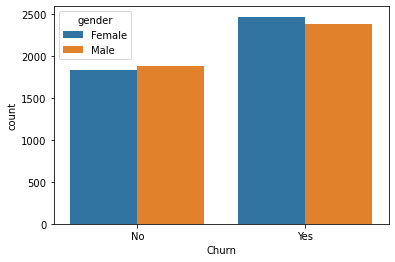

In [18]:
sns.countplot(data = df3, x=df3.Churn, hue = df3.gender)

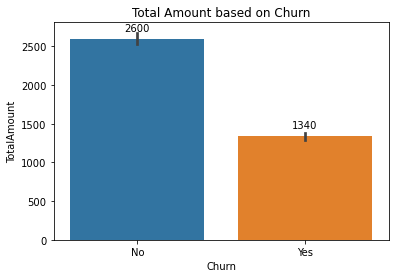

In [19]:
ax = sns.barplot(x=df3.Churn, y=df3.TotalAmount, data=df3)
ax.set(title='Total Amount based on Churn') # title barplot

# label each bar in barplot
for p in ax.patches:
    
 # get the height of each bar
 height = p.get_height()
    
 # adding text to each bar
 ax.text(
     x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
     
     y = height+100, # y-coordinate position of data label, padded 100 above bar
     
     s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
     
     ha = 'center') # sets horizontal alignment (ha) to center

In [20]:
df3.SeniorCitizen = df3.SeniorCitizen.astype(str)

In [21]:
df3.SeniorCitizen

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12326    0.0
12327    0.0
12328    0.0
12331    0.0
12332    0.0
Name: SeniorCitizen, Length: 8575, dtype: object

<AxesSubplot:xlabel='Churn', ylabel='count'>

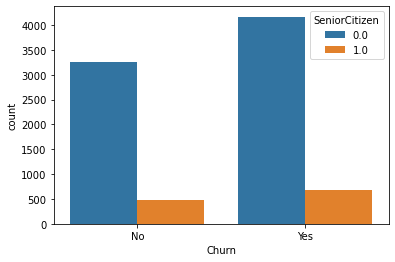

In [22]:
sns.countplot(data = df3, x = df3.Churn, hue = df3.SeniorCitizen)

<AxesSubplot:xlabel='Churn', ylabel='count'>

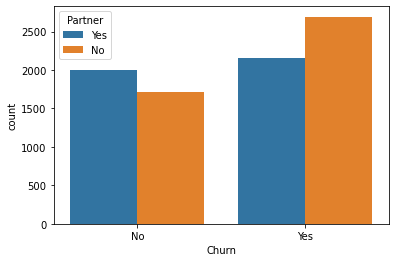

In [23]:
sns.countplot(data = df3, x = df3.Churn, hue = df3.Partner)

In [24]:
objectlst = list(df3.select_dtypes(["object"]).columns)
objectlst

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'CallService',
 'MultipleConnections',
 'InternetConnection',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtectionService',
 'TechnicalHelp',
 'OnlineTV',
 'OnlineMovies',
 'Agreement',
 'BillingMethod',
 'PaymentMethod',
 'Churn']

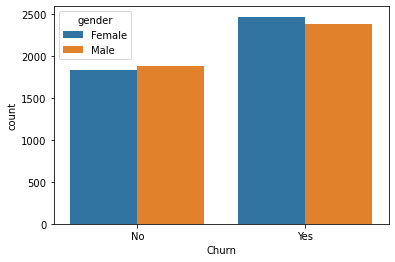

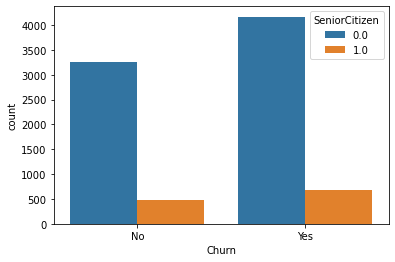

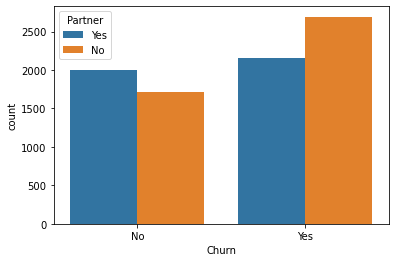

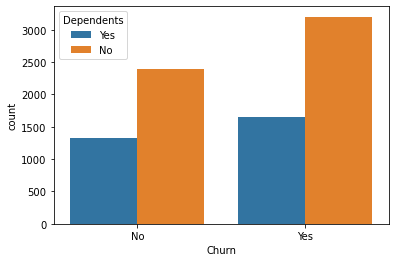

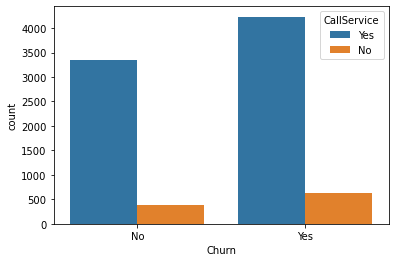

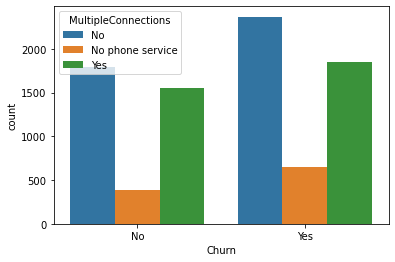

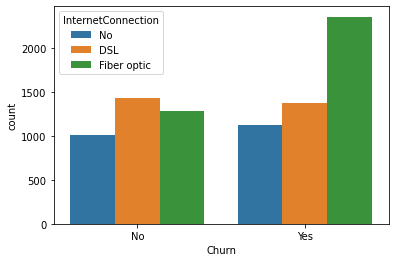

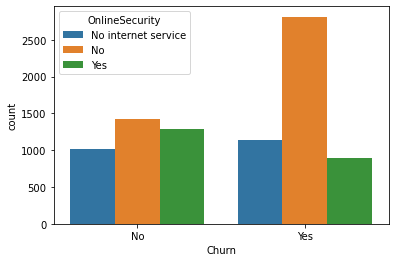

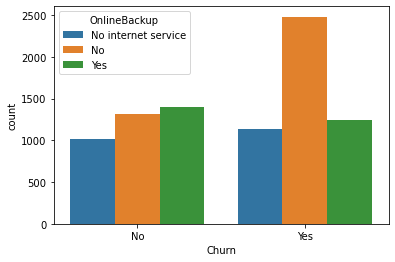

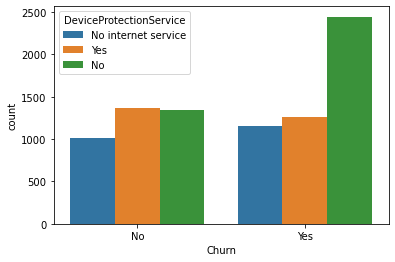

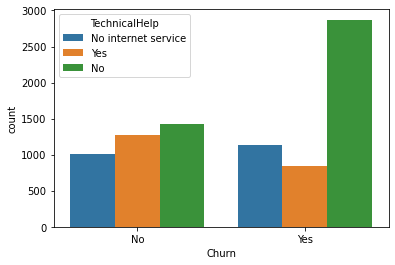

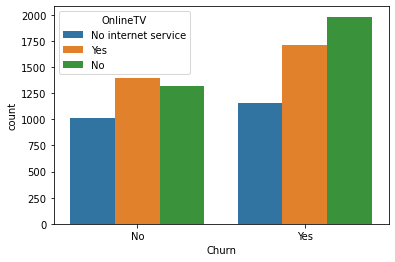

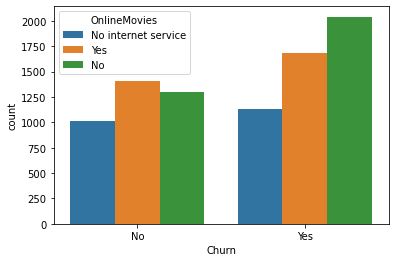

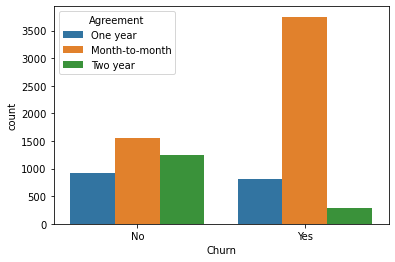

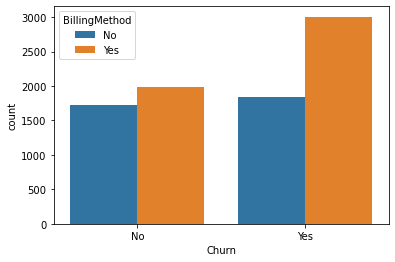

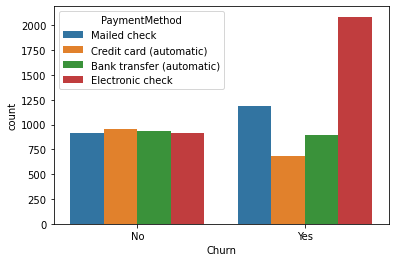

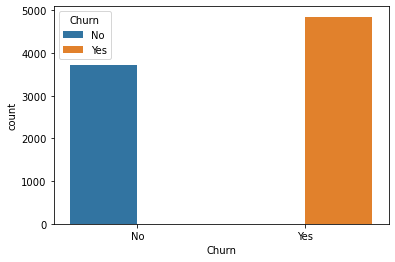

In [25]:
for col in objectlst:
    plt.figure()
    sns.countplot(data = df3, x = df3.Churn, hue = df3[col])    

In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8575 entries, 0 to 12332
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   8575 non-null   object 
 1   SeniorCitizen            8575 non-null   object 
 2   Partner                  8575 non-null   object 
 3   Dependents               8575 non-null   object 
 4   tenure                   8575 non-null   float64
 5   CallService              8575 non-null   object 
 6   MultipleConnections      8575 non-null   object 
 7   InternetConnection       8575 non-null   object 
 8   OnlineSecurity           8575 non-null   object 
 9   OnlineBackup             8575 non-null   object 
 10  DeviceProtectionService  8575 non-null   object 
 11  TechnicalHelp            8575 non-null   object 
 12  OnlineTV                 8575 non-null   object 
 13  OnlineMovies             8575 non-null   object 
 14  Agreement              

In [27]:
floatlst = list(df3.select_dtypes(["float64"]).columns)
floatlst

['tenure', 'MonthlyServiceCharges', 'TotalAmount']

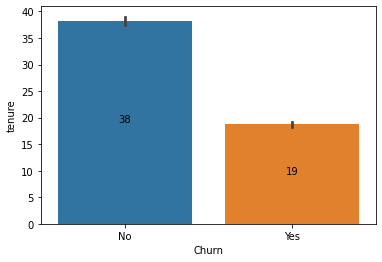

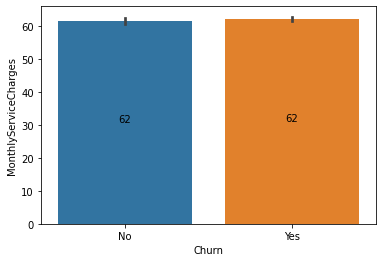

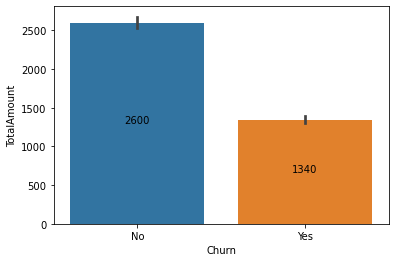

In [28]:
for col in floatlst:
    plt.figure()
    ax = sns.barplot(data = df3, x = df3.Churn, y = df3[col])
    for p in ax.patches:
        ht = p.get_height()
        ax.text(
        x = p.get_x()+(p.get_width()/2),
        y = ht/2,
        s = '{:.0f}'.format(ht),
        ha = 'center')
        

<AxesSubplot:>

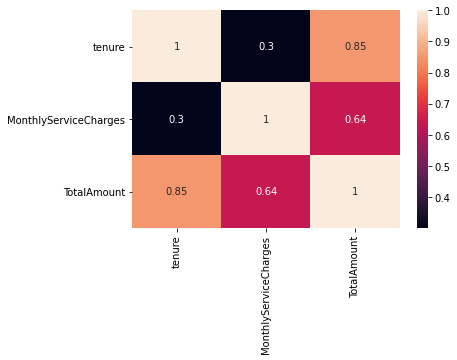

In [29]:
sns.heatmap(df3.corr(), annot = True)

## Machine Learning Modelling

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [31]:
from sklearn.model_selection import train_test_split
tts = train_test_split

In [32]:
X = df3.drop("Churn", axis=1)
y = df3.Churn

In [33]:
X_train, X_test, y_train, y_test = tts(X,y)

In [34]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6431, 19) (2144, 19) (6431,) (2144,)


In [35]:
X_train_std = sc.fit_transform(X_train[floatlst])
X_test_std = sc.transform(X_test[floatlst])

In [36]:
print(X_train_std.shape, X_test_std.shape)

(6431, 3) (2144, 3)


In [37]:
X_train_df = pd.DataFrame(X_train_std, columns = floatlst)
X_test_df = pd.DataFrame(X_test_std, columns = floatlst)

In [38]:
print(X_train_df.shape, X_test_df.shape, df3.shape)

(6431, 3) (2144, 3) (8575, 20)


One Hot Encoding for Categorical Variables

In [39]:
X_train_obj = X_train.drop(columns = floatlst)
X_test_obj = X_test.drop(columns = floatlst)

In [40]:
print(X_train_obj.shape, X_test_obj.shape)

(6431, 16) (2144, 16)


In [41]:
X_train_obj_dm = pd.get_dummies(X_train_obj, drop_first = True).reset_index()

In [42]:
X_test_obj_dm = pd.get_dummies(X_test_obj, drop_first = True).reset_index()

In [43]:
print(X_train_obj_dm.shape, X_test_obj_dm.shape)

(6431, 28) (2144, 28)


In [44]:
X_train = pd.concat([X_train_obj_dm, X_train_df], axis = 1)
X_test = pd.concat([X_test_obj_dm, X_test_df],axis = 1)

In [45]:
print(X_train.shape, X_test.shape)

(6431, 31) (2144, 31)


### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter = 5000)

In [47]:
log_model.fit(X_train,y_train)
log_preds = log_model.predict(X_test)

### Checking the Accuracy

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [49]:
accuracy_score(log_preds, y_test)

0.9925373134328358

In [50]:
confusion_matrix(log_preds, y_test)

array([[ 905,    4],
       [  12, 1223]], dtype=int64)

In [51]:
print(classification_report(log_preds, y_test))

              precision    recall  f1-score   support

          No       0.99      1.00      0.99       909
         Yes       1.00      0.99      0.99      1235

    accuracy                           0.99      2144
   macro avg       0.99      0.99      0.99      2144
weighted avg       0.99      0.99      0.99      2144



### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = "entropy")
dtree.fit(X_train,y_train)
dtree_preds = dtree.predict(X_test)

In [53]:
accuracy_score(dtree_preds,y_test)

1.0

In [54]:
confusion_matrix(dtree_preds, y_test)

array([[ 917,    0],
       [   0, 1227]], dtype=int64)

In [55]:
print(classification_report(dtree_preds,y_test))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00       917
         Yes       1.00      1.00      1.00      1227

    accuracy                           1.00      2144
   macro avg       1.00      1.00      1.00      2144
weighted avg       1.00      1.00      1.00      2144



### Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

In [57]:
accuracy_score(rfc_pred, y_test).round(3)

1.0

In [58]:
confusion_matrix(rfc_pred,y_test)

array([[ 917,    0],
       [   0, 1227]], dtype=int64)

In [59]:
print(classification_report(rfc_pred, y_test))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00       917
         Yes       1.00      1.00      1.00      1227

    accuracy                           1.00      2144
   macro avg       1.00      1.00      1.00      2144
weighted avg       1.00      1.00      1.00      2144



### K Nearest Neighbor

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [61]:
accuracy_score(knn_pred, y_test)

1.0

In [62]:
confusion_matrix(knn_pred, y_test)

array([[ 917,    0],
       [   0, 1227]], dtype=int64)

In [63]:
print(classification_report(knn_pred, y_test))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00       917
         Yes       1.00      1.00      1.00      1227

    accuracy                           1.00      2144
   macro avg       1.00      1.00      1.00      2144
weighted avg       1.00      1.00      1.00      2144

